REGRESIÓN LOGÍSTICA

In [21]:

# FUNCIONA: MODELO REGRESIÓN LOGÍSTICA (MALA PRECISIÓN)
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data

# Configurar opciones de visualización
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

# Cargar el archivo CSV
file_path = '../data/raw/Unicorn_df.csv'  # Asegúrate de que esta ruta sea correcta
df = load_data(file_path)

# Limpiar el DataFrame
df = clean_dataframe(df)

# Agregar el conteo de inversores
df = add_investor_count(df)

# Guardar el DataFrame limpio
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))

# ---------- Aplicar Label Encoding a las variables categóricas ----------

le = LabelEncoder()

# Codificar variables categóricas
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Investor 1'] = le.fit_transform(df['Investor 1'])
df['Investor 2'] = le.fit_transform(df['Investor 2'])
df['Investor 3'] = le.fit_transform(df['Investor 3'])

# ---------- Binning para la columna Valuation ($B) ----------
# Ajustar los bins para incluir valores superiores a 100
bins = [0, 1, 5, 10, 50, float('inf')]  # Ahora incluye cualquier valor mayor a 50
labels = ['<1B', '1-5B', '5-10B', '10-50B', '>50B']  # Ajustar etiquetas
df['Valuation Category'] = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Preparar las características (X) y la variable objetivo (y)
X = df.drop(['Company', 'Valuation ($B)', 'Valuation Category', 'Date Joined'], axis=1)  # Eliminar 'Date Joined' también
y = df['Valuation Category']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- Entrenar y evaluar el modelo (Logistic Regression) ----------
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)  # Usar los datos escalados
y_pred = clf.predict(X_test_scaled)  # Usar los datos escalados para predicciones

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Matriz de confusión y reporte de clasificación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la columna de categorías de valuación para verificar
print(df[['Valuation ($B)', 'Valuation Category']].head(10))

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))


Archivo guardado


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,Sequoia Capital China,Sig Asia Investments,Sina Weibo,3
1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,3
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,Lowercasecapital,Capitalg,3
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,3
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply Chain Logistics & Delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,3
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data Management & Analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,3
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,Index Ventures,Dst Global,Ribbit Capital,3
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint E.Ventures,Kaszek Ventures,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,Kkr,Smash Ventures,3


Accuracy: 0.6276595744680851
F1 Score: 0.48407731887081074

Matriz de confusión:
[[118   0   0   0   0]
 [  4   0   0   0   0]
 [ 19   0   0   0   0]
 [ 46   0   0   0   0]
 [  1   0   0   0   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.63      1.00      0.77       118
      10-50B       0.00      0.00      0.00         4
       5-10B       0.00      0.00      0.00        19
         <1B       0.00      0.00      0.00        46
        >50B       0.00      0.00      0.00         1

    accuracy                           0.63       188
   macro avg       0.13      0.20      0.15       188
weighted avg       0.39      0.63      0.48       188

   Valuation ($B) Valuation Category
0           140.0               >50B
1           100.3               >50B
2            95.0               >50B
3            45.6             10-50B
4            40.0             10-50B
5            39.0             10-50B
6            38.0           

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors,Valuation Category
0,Bytedance,140.0,2017-04-07,8,13,0,387,426,400,3,>50B
1,Spacex,100.3,2012-12-01,43,89,12,172,144,373,3,>50B
2,Stripe,95.0,2014-01-23,43,184,7,259,299,76,3,>50B
3,Klarna,45.6,2011-12-12,37,207,7,237,415,165,3,10-50B
4,Canva,40.0,2018-01-08,1,209,10,387,70,280,3,10-50B
5,Instacart,39.0,2014-12-30,43,184,13,259,275,96,3,10-50B
6,Databricks,38.0,2019-02-05,43,184,4,32,325,50,3,10-50B
7,Revolut,33.0,2018-04-26,42,122,7,228,146,370,3,10-50B
8,Nubank,30.0,2018-03-01,5,192,7,386,384,250,3,10-50B
9,Epic Games,28.7,2018-10-26,43,39,12,440,274,406,3,10-50B


MODELOS RANDOM FOREST

In [11]:
# MODELO RANDOM FOREST v1: FUNCIONA (BAJA PRECISIÓN)

import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data

# Configurar opciones de visualización
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

# Cargar el archivo CSV
file_path = '../data/raw/Unicorn_df.csv'  # Asegúrate de que esta ruta sea correcta
df = load_data(file_path)

# Limpiar el DataFrame
df = clean_dataframe(df)

# Agregar el conteo de inversores
df = add_investor_count(df)

# Guardar el DataFrame limpio
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))

# ---------- Aplicar Label Encoding a las variables categóricas ----------
le = LabelEncoder()

# Codificar variables categóricas
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Investor 1'] = le.fit_transform(df['Investor 1'])
df['Investor 2'] = le.fit_transform(df['Investor 2'])
df['Investor 3'] = le.fit_transform(df['Investor 3'])

# ---------- Binning para la columna Valuation ($B) ----------
# Ajustar los bins para incluir valores superiores a 100
bins = [0, 1, 5, 10, 50, float('inf')]  # Ahora incluye cualquier valor mayor a 100
labels = ['<1B', '1-5B', '5-10B', '10-50B', '>50B']  # Ajustar etiquetas
df['Valuation Category'] = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Preparar las características (X) y la variable objetivo (y)
X = df.drop(['Company', 'Valuation ($B)', 'Valuation Category', 'Date Joined'], axis=1)  # Eliminar 'Date Joined' también
y = df['Valuation Category']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Escalado de características (opcional, pero recomendado) ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- Entrenar y evaluar el modelo (Random Forest) ----------
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Matriz de confusión y reporte de clasificación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

# Mostrar la columna de categorías de valuación para verificar
print(df[['Valuation ($B)', 'Valuation Category']].head(10))


# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))


Archivo guardado


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,Sequoia Capital China,Sig Asia Investments,Sina Weibo,3
1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,3
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,Lowercasecapital,Capitalg,3
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,3
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply Chain Logistics & Delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,3
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data Management & Analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,3
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,Index Ventures,Dst Global,Ribbit Capital,3
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint E.Ventures,Kaszek Ventures,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,Kkr,Smash Ventures,3


Random Forest - Accuracy: 0.5904255319148937
Random Forest - F1 Score: 0.49035972801052863

Matriz de confusión:
[[108   0   1   9   0]
 [  4   0   0   0   0]
 [ 17   0   0   2   0]
 [ 43   0   0   3   0]
 [  1   0   0   0   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.62      0.92      0.74       118
      10-50B       0.00      0.00      0.00         4
       5-10B       0.00      0.00      0.00        19
         <1B       0.21      0.07      0.10        46
        >50B       0.00      0.00      0.00         1

    accuracy                           0.59       188
   macro avg       0.17      0.20      0.17       188
weighted avg       0.44      0.59      0.49       188

   Valuation ($B) Valuation Category
0           140.0               >50B
1           100.3               >50B
2            95.0               >50B
3            45.6             10-50B
4            40.0             10-50B
5            39.0             10-

c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Carlos\.ai-navigator\conda\envs\ml-project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors,Valuation Category
0,Bytedance,140.0,2017-04-07,8,13,0,387,426,400,3,>50B
1,Spacex,100.3,2012-12-01,43,89,12,172,144,373,3,>50B
2,Stripe,95.0,2014-01-23,43,184,7,259,299,76,3,>50B
3,Klarna,45.6,2011-12-12,37,207,7,237,415,165,3,10-50B
4,Canva,40.0,2018-01-08,1,209,10,387,70,280,3,10-50B
5,Instacart,39.0,2014-12-30,43,184,13,259,275,96,3,10-50B
6,Databricks,38.0,2019-02-05,43,184,4,32,325,50,3,10-50B
7,Revolut,33.0,2018-04-26,42,122,7,228,146,370,3,10-50B
8,Nubank,30.0,2018-03-01,5,192,7,386,384,250,3,10-50B
9,Epic Games,28.7,2018-10-26,43,39,12,440,274,406,3,10-50B


In [23]:
# MODELO RANDOM FOREST v2: FUNCIONA, mejora de precisión (MEDIA PRECISIÓN, LUEGO ALTA)

import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data

# Configurar opciones de visualización
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

# Cargar el archivo CSV
file_path = '../data/raw/Unicorn_df.csv'  # Asegúrate de que esta ruta sea correcta
df = load_data(file_path)

# Limpiar el DataFrame
df = clean_dataframe(df)

# Agregar el conteo de inversores
df = add_investor_count(df)

# Guardar el DataFrame limpio
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))

# ---------- Aplicar Label Encoding a las variables categóricas ---------- 
le = LabelEncoder()

# Codificar variables categóricas
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Investor 1'] = le.fit_transform(df['Investor 1'])
df['Investor 2'] = le.fit_transform(df['Investor 2'])
df['Investor 3'] = le.fit_transform(df['Investor 3'])

# ---------- Binning para la columna Valuation ($B) ----------
bins = [0, 1, 5, 10, 50, float('inf')]  # Ajustar los bins
labels = ['<1B', '1-5B', '5-10B', '10-50B', '>50B']  # Ajustar etiquetas
df['Valuation Category'] = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Preparar las características (X) y la variable objetivo (y)
X = df.drop(['Company', 'Valuation ($B)', 'Valuation Category', 'Date Joined'], axis=1)  # Eliminar 'Date Joined' también
y = df['Valuation Category']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de las clases en el conjunto de entrenamiento
print("Distribución de clases en y_train antes de SMOTE:")
print(y_train.value_counts())

# ---------- Aplicar SMOTE para el balanceo de clases ----------
smote = SMOTE(random_state=42, k_neighbors=1)  # Cambiar el número de vecinos a 2
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el tamaño de las clases después de SMOTE
print("Distribución de clases en y_train después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# ---------- Escalado de características (opcional, pero recomendado) ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ---------- Entrenar y evaluar el modelo (Random Forest) ----------
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Matriz de confusión y reporte de clasificación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

# Mostrar la columna de categorías de valuación para verificar
print(df[['Valuation ($B)', 'Valuation Category']].head(10))

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))



Archivo guardado


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,Sequoia Capital China,Sig Asia Investments,Sina Weibo,3
1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,3
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,Lowercasecapital,Capitalg,3
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,3
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply Chain Logistics & Delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,3
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data Management & Analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,3
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,Index Ventures,Dst Global,Ribbit Capital,3
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint E.Ventures,Kaszek Ventures,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,Kkr,Smash Ventures,3


Distribución de clases en y_train antes de SMOTE:
Valuation Category
1-5B      477
<1B       179
5-10B      62
10-50B     28
>50B        2
Name: count, dtype: int64
Distribución de clases en y_train después de SMOTE:
Valuation Category
<1B       477
1-5B      477
5-10B     477
10-50B    477
>50B      477
Name: count, dtype: int64
Random Forest - Accuracy: 0.5638297872340425
Random Forest - F1 Score: 0.5437724246837526

Matriz de confusión:
[[88  2  7 21  0]
 [ 4  0  0  0  0]
 [10  1  0  8  0]
 [25  1  2 18  0]
 [ 1  0  0  0  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.69      0.75      0.72       118
      10-50B       0.00      0.00      0.00         4
       5-10B       0.00      0.00      0.00        19
         <1B       0.38      0.39      0.39        46
        >50B       0.00      0.00      0.00         1

    accuracy                           0.56       188
   macro avg       0.21      0.23      0.22       188
weig

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors,Valuation Category
0,Bytedance,140.0,2017-04-07,8,13,0,387,426,400,3,>50B
1,Spacex,100.3,2012-12-01,43,89,12,172,144,373,3,>50B
2,Stripe,95.0,2014-01-23,43,184,7,259,299,76,3,>50B
3,Klarna,45.6,2011-12-12,37,207,7,237,415,165,3,10-50B
4,Canva,40.0,2018-01-08,1,209,10,387,70,280,3,10-50B
5,Instacart,39.0,2014-12-30,43,184,13,259,275,96,3,10-50B
6,Databricks,38.0,2019-02-05,43,184,4,32,325,50,3,10-50B
7,Revolut,33.0,2018-04-26,42,122,7,228,146,370,3,10-50B
8,Nubank,30.0,2018-03-01,5,192,7,386,384,250,3,10-50B
9,Epic Games,28.7,2018-10-26,43,39,12,440,274,406,3,10-50B


In [24]:
# MODELO V2

from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Crear el clasificador Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Configurar la búsqueda
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, scoring='f1_weighted', n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train_scaled, y_train_resampled)

# Resultados de la búsqueda
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación F1:", grid_search.best_score_)


Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación F1: 0.8738312064167327


In [25]:
# MODELO V2

# Crear un nuevo clasificador con los mejores parámetros
best_rf_clf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

# Entrenar el modelo en los datos de entrenamiento reequilibrados
best_rf_clf.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_best_rf = best_rf_clf.predict(X_test_scaled)

# Evaluar el modelo
print("Random Forest (mejores parámetros) - Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Random Forest (mejores parámetros) - F1 Score:", f1_score(y_test, y_pred_best_rf, average='weighted'))


Random Forest (mejores parámetros) - Accuracy: 0.6276595744680851
Random Forest (mejores parámetros) - F1 Score: 0.48407731887081074


In [26]:
# MODELO V2

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_best_rf))



Matriz de confusión:
[[118   0   0   0   0]
 [  4   0   0   0   0]
 [ 19   0   0   0   0]
 [ 46   0   0   0   0]
 [  1   0   0   0   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.63      1.00      0.77       118
      10-50B       0.00      0.00      0.00         4
       5-10B       0.00      0.00      0.00        19
         <1B       0.00      0.00      0.00        46
        >50B       0.00      0.00      0.00         1

    accuracy                           0.63       188
   macro avg       0.13      0.20      0.15       188
weighted avg       0.39      0.63      0.48       188



In [27]:
# MODELO V2

# Antes de dividir el conjunto de datos
print("Distribución de clases en y:")
print(y.value_counts())

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo (ejemplo con Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluación del modelo con zero_division
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))


Distribución de clases en y:
Valuation Category
1-5B      595
<1B       225
5-10B      81
10-50B     32
>50B        3
Name: count, dtype: int64

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.63      0.93      0.75       120
      10-50B       1.00      0.00      0.00         6
       5-10B       0.00      0.00      0.00        16
         <1B       0.11      0.02      0.04        45
        >50B       1.00      0.00      0.00         1

    accuracy                           0.60       188
   macro avg       0.55      0.19      0.16       188
weighted avg       0.47      0.60      0.49       188



In [30]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros para probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30, None],  # Profundidad máxima
    'min_samples_split': [2, 5, 10],  # Tamaño mínimo para dividir nodos
    'min_samples_leaf': [1, 2, 4],  # Tamaño mínimo de las hojas
}

# Crear el modelo
rf = RandomForestClassifier(random_state=42)

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train_resampled)

# Mejor resultado
print(f"Mejor score: {grid_search.best_score_}")
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejor score: 0.8905660377358491
Mejores hiperparámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


MODELO GRADIENT BOOSTING

In [28]:
# MODELO GRADIENT BOOSTING: FUNCIONA, algo peor que random forest (MEDIA-BAJA PRECISIÓN)

import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier  # Importar GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data

# Configurar opciones de visualización
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

# Cargar el archivo CSV
file_path = '../data/raw/Unicorn_df.csv'  # Asegúrate de que esta ruta sea correcta
df = load_data(file_path)

# Limpiar el DataFrame
df = clean_dataframe(df)

# Agregar el conteo de inversores
df = add_investor_count(df)

# Guardar el DataFrame limpio
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))

# ---------- Aplicar Label Encoding a las variables categóricas ---------- 
le = LabelEncoder()

# Codificar variables categóricas
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Investor 1'] = le.fit_transform(df['Investor 1'])
df['Investor 2'] = le.fit_transform(df['Investor 2'])
df['Investor 3'] = le.fit_transform(df['Investor 3'])

# ---------- Binning para la columna Valuation ($B) ----------
bins = [0, 1, 5, 10, 50, float('inf')]  # Ajustar los bins
labels = ['<1B', '1-5B', '5-10B', '10-50B', '>50B']  # Ajustar etiquetas
df['Valuation Category'] = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Preparar las características (X) y la variable objetivo (y)
X = df.drop(['Company', 'Valuation ($B)', 'Valuation Category', 'Date Joined'], axis=1)  # Eliminar 'Date Joined' también
y = df['Valuation Category']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de las clases en el conjunto de entrenamiento
print("Distribución de clases en y_train antes de SMOTE:")
print(y_train.value_counts())

# ---------- Aplicar SMOTE para el balanceo de clases ----------
smote = SMOTE(random_state=42, k_neighbors=1)  # Cambiar el número de vecinos a 2
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el tamaño de las clases después de SMOTE
print("Distribución de clases en y_train después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# ---------- Escalado de características (opcional, pero recomendado) ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ---------- Entrenar y evaluar el modelo (Gradient Boosting) ----------
gb_clf = GradientBoostingClassifier(random_state=42)  # Crear el modelo de Gradient Boosting
gb_clf.fit(X_train_scaled, y_train_resampled)  # Entrenar el modelo
y_pred_gb = gb_clf.predict(X_test_scaled)  # Hacer predicciones

# Evaluación del modelo
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting - F1 Score:", f1_score(y_test, y_pred_gb, average='weighted'))

# Matriz de confusión y reporte de clasificación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_gb))

# Mostrar la columna de categorías de valuación para verificar
print(df[['Valuation ($B)', 'Valuation Category']].head(10))

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))


Archivo guardado


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,Sequoia Capital China,Sig Asia Investments,Sina Weibo,3
1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,3
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,Lowercasecapital,Capitalg,3
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,3
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply Chain Logistics & Delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,3
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data Management & Analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,3
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,Index Ventures,Dst Global,Ribbit Capital,3
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint E.Ventures,Kaszek Ventures,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,Kkr,Smash Ventures,3


Distribución de clases en y_train antes de SMOTE:
Valuation Category
1-5B      477
<1B       179
5-10B      62
10-50B     28
>50B        2
Name: count, dtype: int64
Distribución de clases en y_train después de SMOTE:
Valuation Category
<1B       477
1-5B      477
5-10B     477
10-50B    477
>50B      477
Name: count, dtype: int64
Gradient Boosting - Accuracy: 0.5106382978723404
Gradient Boosting - F1 Score: 0.5161450282815143

Matriz de confusión:
[[76  3 12 27  0]
 [ 4  0  0  0  0]
 [10  1  1  7  0]
 [21  2  4 19  0]
 [ 0  1  0  0  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.68      0.64      0.66       118
      10-50B       0.00      0.00      0.00         4
       5-10B       0.06      0.05      0.06        19
         <1B       0.36      0.41      0.38        46
        >50B       0.00      0.00      0.00         1

    accuracy                           0.51       188
   macro avg       0.22      0.22      0.22       

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors,Valuation Category
0,Bytedance,140.0,2017-04-07,8,13,0,387,426,400,3,>50B
1,Spacex,100.3,2012-12-01,43,89,12,172,144,373,3,>50B
2,Stripe,95.0,2014-01-23,43,184,7,259,299,76,3,>50B
3,Klarna,45.6,2011-12-12,37,207,7,237,415,165,3,10-50B
4,Canva,40.0,2018-01-08,1,209,10,387,70,280,3,10-50B
5,Instacart,39.0,2014-12-30,43,184,13,259,275,96,3,10-50B
6,Databricks,38.0,2019-02-05,43,184,4,32,325,50,3,10-50B
7,Revolut,33.0,2018-04-26,42,122,7,228,146,370,3,10-50B
8,Nubank,30.0,2018-03-01,5,192,7,386,384,250,3,10-50B
9,Epic Games,28.7,2018-10-26,43,39,12,440,274,406,3,10-50B


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, max_depth=5, random_state=42)
gbc.fit(X_train_scaled, y_train_resampled)
y_pred = gbc.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")


Accuracy: 0.5372340425531915
F1 Score: 0.5359474752592482


In [32]:
# MODELO GRADIENT BOOSTING V2: FUNCIONA, peor que el random forest (MEDIA PRECISIÓN)

import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier  # Importar GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data

# Configurar opciones de visualización
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

# Cargar el archivo CSV
file_path = '../data/raw/Unicorn_df.csv'  # Asegúrate de que esta ruta sea correcta
df = load_data(file_path)

# Limpiar el DataFrame
df = clean_dataframe(df)

# Agregar el conteo de inversores
df = add_investor_count(df)

# Guardar el DataFrame limpio
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))

# ---------- Aplicar Label Encoding a las variables categóricas ---------- 
le = LabelEncoder()

# Codificar variables categóricas
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Investor 1'] = le.fit_transform(df['Investor 1'])
df['Investor 2'] = le.fit_transform(df['Investor 2'])
df['Investor 3'] = le.fit_transform(df['Investor 3'])

# ---------- Binning para la columna Valuation ($B) ---------- 
bins = [0, 1, 5, 10, 50, float('inf')]  # Ajustar los bins
labels = ['<1B', '1-5B', '5-10B', '10-50B', '>50B']  # Ajustar etiquetas
df['Valuation Category'] = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Preparar las características (X) y la variable objetivo (y)
X = df.drop(['Company', 'Valuation ($B)', 'Valuation Category', 'Date Joined'], axis=1)  # Eliminar 'Date Joined' también
y = df['Valuation Category']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de las clases en el conjunto de entrenamiento
print("Distribución de clases en y_train antes de SMOTE:")
print(y_train.value_counts())

# ---------- Aplicar SMOTE para el balanceo de clases ---------- 
smote = SMOTE(random_state=42, k_neighbors=1)  # Cambiar el número de vecinos a 2
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el tamaño de las clases después de SMOTE
print("Distribución de clases en y_train después de SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# ---------- Escalado de características (opcional, pero recomendado) ---------- 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ---------- Entrenamiento y ajuste del modelo (Gradient Boosting) ----------
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9]
}

# Crear el modelo
gb_clf = GradientBoostingClassifier(random_state=42)

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train_resampled)

# Mejor resultado
print(f"Mejor score: {grid_search.best_score_}")
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el mejor modelo encontrado por la búsqueda de cuadrícula
best_gb_clf = grid_search.best_estimator_
y_pred_gb = best_gb_clf.predict(X_test_scaled)  # Hacer predicciones

# Evaluación del modelo
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting - F1 Score:", f1_score(y_test, y_pred_gb, average='weighted'))

# Matriz de confusión y reporte de clasificación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_gb))

# Mostrar la columna de categorías de valuación para verificar
print(df[['Valuation ($B)', 'Valuation Category']].head(10))

# Mostrar las primeras 10 filas del DataFrame limpio
display(df.head(10))


Archivo guardado


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,Sequoia Capital China,Sig Asia Investments,Sina Weibo,3
1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,3
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,Lowercasecapital,Capitalg,3
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,3
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply Chain Logistics & Delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,3
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data Management & Analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,3
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,Index Ventures,Dst Global,Ribbit Capital,3
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint E.Ventures,Kaszek Ventures,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,Kkr,Smash Ventures,3


Distribución de clases en y_train antes de SMOTE:
Valuation Category
1-5B      477
<1B       179
5-10B      62
10-50B     28
>50B        2
Name: count, dtype: int64
Distribución de clases en y_train después de SMOTE:
Valuation Category
<1B       477
1-5B      477
5-10B     477
10-50B    477
>50B      477
Name: count, dtype: int64
Mejor score: 0.8981132075471698
Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Gradient Boosting - Accuracy: 0.5531914893617021
Gradient Boosting - F1 Score: 0.5244070350453328

Matriz de confusión:
[[88  1  6 23  0]
 [ 4  0  0  0  0]
 [13  0  0  6  0]
 [28  0  1 16  1]
 [ 1  0  0  0  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.66      0.75      0.70       118
      10-50B       0.00      0.00      0.00         4
       5-10B       0.00      0.00      0.00        19
         <1B       0.36      

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors,Valuation Category
0,Bytedance,140.0,2017-04-07,8,13,0,387,426,400,3,>50B
1,Spacex,100.3,2012-12-01,43,89,12,172,144,373,3,>50B
2,Stripe,95.0,2014-01-23,43,184,7,259,299,76,3,>50B
3,Klarna,45.6,2011-12-12,37,207,7,237,415,165,3,10-50B
4,Canva,40.0,2018-01-08,1,209,10,387,70,280,3,10-50B
5,Instacart,39.0,2014-12-30,43,184,13,259,275,96,3,10-50B
6,Databricks,38.0,2019-02-05,43,184,4,32,325,50,3,10-50B
7,Revolut,33.0,2018-04-26,42,122,7,228,146,370,3,10-50B
8,Nubank,30.0,2018-03-01,5,192,7,386,384,250,3,10-50B
9,Epic Games,28.7,2018-10-26,43,39,12,440,274,406,3,10-50B


Archivo guardado

Logistic Regression - Accuracy: 0.1809
Logistic Regression - F1 Score: 0.2399

Logistic Regression - Matriz de confusión:
[[19 45 28 15 11]
 [ 1  2  0  1  0]
 [ 1 10  3  4  1]
 [ 7 17  5 10  7]
 [ 0  1  0  0  0]]

Logistic Regression - Reporte de clasificación:
              precision    recall  f1-score   support

        1-5B       0.68      0.16      0.26       118
      10-50B       0.03      0.50      0.05         4
       5-10B       0.08      0.16      0.11        19
         <1B       0.33      0.22      0.26        46
        >50B       0.00      0.00      0.00         1

    accuracy                           0.18       188
   macro avg       0.22      0.21      0.14       188
weighted avg       0.52      0.18      0.24       188


Decision Tree - Accuracy: 0.3936
Decision Tree - F1 Score: 0.4168

Decision Tree - Matriz de confusión:
[[61  8 12 36  1]
 [ 3  0  1  0  0]
 [ 9  0  2  8  0]
 [26  4  4 11  1]
 [ 0  1  0  0  0]]

Decision Tree - Reporte de clasifi

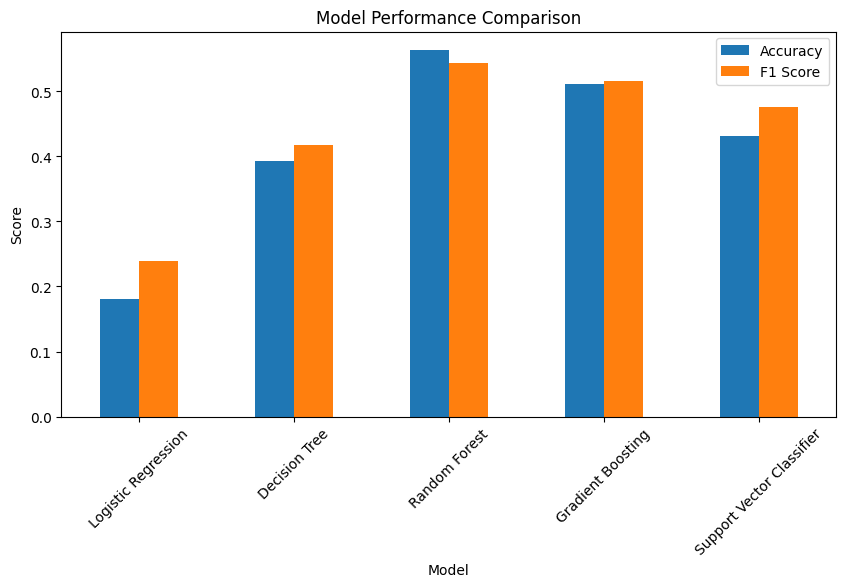

In [17]:
# MODELO DE VARIOS CLASIFICADORES V1

import pandas as pd
import sys
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data

# Cargar y limpiar el DataFrame
file_path = '../data/raw/Unicorn_df.csv'
df = load_data(file_path)
df = clean_dataframe(df)
df = add_investor_count(df)
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Aplicar Label Encoding a las variables categóricas
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['Industry'] = le.fit_transform(df['Industry'])
df['Investor 1'] = le.fit_transform(df['Investor 1'])
df['Investor 2'] = le.fit_transform(df['Investor 2'])
df['Investor 3'] = le.fit_transform(df['Investor 3'])

# Binning para la columna Valuation ($B)
bins = [0, 1, 5, 10, 50, float('inf')]
labels = ['<1B', '1-5B', '5-10B', '10-50B', '>50B']
df['Valuation Category'] = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

# Preparar características y variable objetivo
X = df.drop(['Company', 'Valuation ($B)', 'Valuation Category', 'Date Joined'], axis=1)
y = df['Valuation Category']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para el balanceo de clases
smote = SMOTE(random_state=42, k_neighbors=1)  # Cambiar n_neighbors a 1
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características (recomendado solo para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Lista de modelos para probar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC()
}

# Almacenar resultados en un DataFrame
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

# Evaluar cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_scaled if model_name != 'Decision Tree' else X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled if model_name != 'Decision Tree' else X_test)

    # Evaluación del modelo
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Almacenar resultados utilizando loc
    results.loc[len(results)] = {'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}

    print(f"\n{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - F1 Score: {f1:.4f}")
    
    # Matriz de confusión y reporte de clasificación
    print(f"\n{model_name} - Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\n{model_name} - Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

# Visualizar resultados
results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(10, 5), title='Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


Código original

In [19]:
# 1.0 Original

import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Agregar la ruta al directorio de scripts
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts')))

from functions import load_data, clean_dataframe, add_investor_count, save_cleaned_data, basic_stats, valuation_stats, yearly_joined_stats, frequency_stats, investor_stats

# Configurar opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # No dividir el DataFrame en varias líneas

# Cargar el archivo CSV
file_path = '../data/raw/Unicorn_df.csv'  # Asegúrate de que esta ruta sea correcta
df = load_data(file_path)

# Limpiar el DataFrame
df = clean_dataframe(df)

# Agregar el conteo de inversores
df = add_investor_count(df)

# Guardar el DataFrame limpio
save_cleaned_data(df, '../data/clean/Unicorn_clean.csv')

# Mostrar las primeras 50 filas del DataFrame limpio

display(df.head(10))

Archivo guardado


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Number of Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,Sequoia Capital China,Sig Asia Investments,Sina Weibo,3
1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,3
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,Lowercasecapital,Capitalg,3
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,3
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply Chain Logistics & Delivery,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,3
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data Management & Analytics,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,3
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,Index Ventures,Dst Global,Ribbit Capital,3
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital,Redpoint E.Ventures,Kaszek Ventures,3
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings,Kkr,Smash Ventures,3


Correlaciones

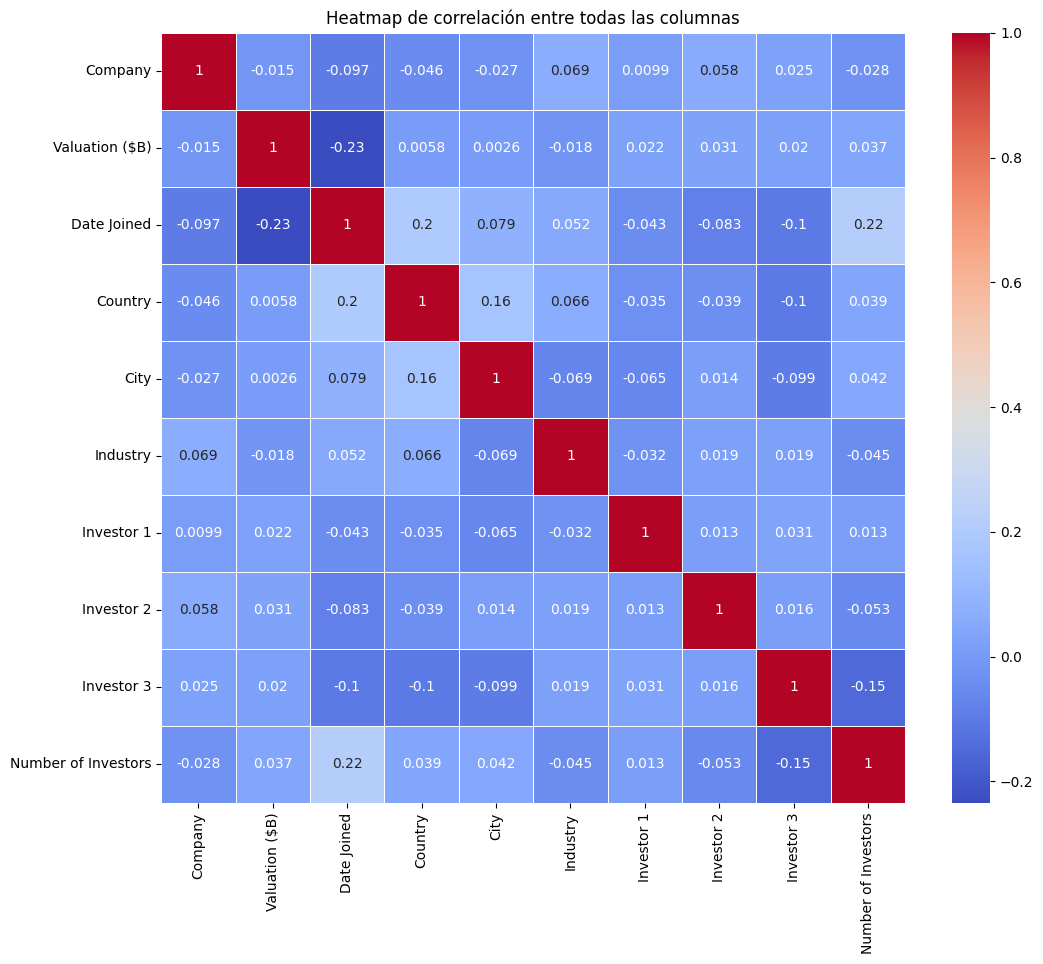

In [20]:
# Funciona con el código marcado como "1.0 original"

# Copiar el DataFrame original para evitar modificarlo
df_copy = df.copy()

# Codificar columnas no numéricas utilizando Label Encoding
for column in df_copy.select_dtypes(include=['object']).columns:
    df_copy[column] = df_copy[column].astype('category').cat.codes

# Calcular la matriz de correlación
correlation_matrix = df_copy.corr()

# Crear el heatmap con todas las columnas
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de correlación entre todas las columnas')
plt.show()

# Mostrar estadísticas diversas

In [ ]:
# Muestra la tabla limpia al completo
basic_stats(df)

In [ ]:
# Muestra estadísticas sobre la valoración
valuation_stats(df)

In [ ]:
# Extrae y muestra estadísticas de uniones por año
yearly_joined_stats(df)

In [ ]:
# Muestra la frecuencia de empresas por país y ciudad
frequency_stats(df)

In [ ]:
# Muestra estadísticas sobre los inversores
investor_stats(df)